# Proyecto de  Machine Learning para el desarrollo de un modelo Predictivo donde queremos predecir el  Precio para un DATASET de **Airbnb**.

Primero importamos las líbrerias necesarias para desarrollar nuestro proyecto.

In [1]:
import numpy  as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


Cargamos el dataset de **Airbnb**

In [2]:
data = pd.read_csv('C:/Users/franc/machineLearning/Machine-Learning-101/Proyecto/airbnb-listings-extract.csv', decimal = ".", sep = ";")
print(data.shape)
data.head(5)

(14780, 89)


,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,11210388,https://www.airbnb.com/rooms/11210388,20170306202425,2017-03-07,The Loft-Full Bath-Deck w/View,Loft in the Hill country 12-15 minutes directl...,This loft has a spectacular view of the hills ...,Loft in the Hill country 12-15 minutes directl...,none,This neighborhood is located in the hills west...,...,10.0,10.0,10.0,NaN,NaN,moderate,1.0,3.50,"30.3373609355,-97.8632766782","Host Is Superhost,Host Has Profile Pic,Host Id..."
1,17471131,https://www.airbnb.com/rooms/17471131,20170407214050,2017-04-08,"Claris I, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,10.0,8.0,10.0,HUTB-006721,NaN,super_strict_30,106.0,0.86,"41.3896829422,2.17262543017","Host Has Profile Pic,Requires License,Instant ..."
2,17584891,https://www.airbnb.com/rooms/17584891,20170407214050,2017-04-08,"Style Terrace Red, Friendly Rentals","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...","This apartment has: 1 double bed, 1 double sof...",none,Plaza Cataluña Catalonia Square is the large...,...,NaN,NaN,NaN,HUTB-007527,NaN,super_strict_30,106.0,NaN,"41.3930345489,2.16217327868","Host Has Profile Pic,Requires License,Instant ..."
3,5398030,https://www.airbnb.com/rooms/5398030,20170407214050,2017-04-08,Picasso Suite 1.4 Paseo de Gracia,Live like a local in Barcelona's most chic dis...,You wake up to the sun rising over Barcelona's...,Live like a local in Barcelona's most chic dis...,none,We're right in the heart of the chic L'Eixampl...,...,10.0,10.0,9.0,NaN,NaN,strict,24.0,1.09,"41.3969668101,2.1674178103","Host Has Profile Pic,Host Identity Verified,Re..."
4,18104606,https://www.airbnb.com/rooms/18104606,20170407214050,2017-04-08,Smart City Centre Apartment II,"Unique apartment in vibrant neighborhoods, car...","License: HUTB-005313 Charming apartment, locat...","Unique apartment in vibrant neighborhoods, car...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,flexible,92.0,NaN,"41.3886851936,2.15514963616","Host Has Profile Pic,Host Identity Verified,Is..."


Aquí cargo el dataset completo de Airbnb y lo divido en un conjunto de **entrenamiento** (80%) y un conjunto de **prueba** (20%) usando `train_test_split`. Luego guardo ambos conjuntos como archivos CSV y, a partir de este momento, trabajo únicamente con el conjunto de entrenamiento.


In [3]:
from sklearn.model_selection import train_test_split

full_df = pd.read_csv('C:/Users/franc/machineLearning/Machine-Learning-101/Proyecto/airbnb-listings-extract.csv', decimal = ".", sep = ";")
train, test = train_test_split(full_df, test_size=0.2, shuffle=True, random_state=0)

print(f'Dimensiones del dataset de training: {train.shape}')
print(f'Dimensiones del dataset de test: {test.shape}')

#Guardamos
train.to_csv('C:/Users/franc/machineLearning/Machine-Learning-101/Proyecto/airbnb-listings-extract_train.csv', decimal = ".", sep = ";", index=False)
test.to_csv('C:/Users/franc/machineLearning/Machine-Learning-101/Proyecto/airbnb-listings-extract_test.csv', decimal = ".", sep = ";", index=False)

#A partir de este momento cargamos el dataset de train y trabajamos ÚNICAMENTE con él.
airbnb_data = pd.read_csv('C:/Users/franc/machineLearning/Machine-Learning-101/Proyecto/airbnb-listings-extract_train.csv', decimal = ".", sep = ";")
airbnb_data.head(5)

Dimensiones del dataset de training: (11824, 89)
Dimensiones del dataset de test: (2956, 89)


,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,5994463,https://www.airbnb.com/rooms/5994463,20170407214119,2017-04-08,PISO ATOCHA- FLAT NEAR ATOCHA .,Piso recién reformado cómoda habitación con ba...,"Un piso muy cómodo en Jerónimos, una de las zo...",Piso recién reformado cómoda habitación con ba...,none,El barrio de Jeronimos es un enclave tranquilo...,...,10.0,10.0,9.0,NaN,NaN,moderate,2.0,0.50,"40.4077318793,-3.68481869733","Host Has Profile Pic,Is Location Exact,Require..."
1,14136180,https://www.airbnb.com/rooms/14136180,20170407214119,2017-04-08,The Palace Sol Madrid.,"Lugares de interés: Plaza Mayor, Plaza del Sol...",El apartamento dispone de un dormitorio indepe...,"Lugares de interés: Plaza Mayor, Plaza del Sol...",none,"Situado en el corazón de Madrid, este apartame...",...,10.0,10.0,10.0,NaN,NaN,flexible,1.0,2.43,"40.4158022422,-3.70534037765","Host Has Profile Pic,Host Identity Verified,Re..."
2,15520134,https://www.airbnb.com/rooms/15520134,20170407214119,2017-04-08,por persona la noche metro linea5 vista alegre,"我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...",NaN,"我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,moderate,16.0,NaN,"40.3890481626,-3.74037392557","Host Has Profile Pic,Host Identity Verified,Is..."
3,8809721,https://www.airbnb.com/rooms/8809721,20170407214119,2017-04-08,CITY CENTER JACINTO BENAVENTE ROOM4,This stunning and amazig room is covered with ...,NaN,This stunning and amazig room is covered with ...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,strict,97.0,NaN,"40.4128140929,-3.70305247638","Host Has Profile Pic,Requires License"
4,1162707,https://www.airbnb.com/rooms/1162707,20170407214119,2017-04-08,NICE & BIG DOUBLE ROOM AT DOWNTOWN,NaN,We are a young couple; David (Spain) and Ana (...,We are a young couple; David (Spain) and Ana (...,none,NaN,...,10.0,9.0,9.0,NaN,NaN,strict,2.0,2.08,"40.4386311984,-3.71371613279","Host Has Profile Pic,Host Identity Verified,Is..."


Realizo un Shape para ver el numero de datos que me ha divido en la parte de train 

In [4]:
print(airbnb_data.shape)

(11824, 89)


## Análisis exploratorio usando Head, describe, dtypes, etc

In [43]:
airbnb_data.head(100).T

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
ID,5994463.0,14136180.0,15520134.0,8809721.0,1162707.0,3425435.0,10442879.0,8531782.0,16518897.0,5749070.0,...,1678293.0,14086243.0,6920711.0,229664.0,6367361.0,17958963.0,4089487.0,1858255.0,3627802.0,13488516.0
Host ID,31124866.0,85301317.0,84213235.0,15258781.0,1706029.0,15604118.0,2005372.0,15258781.0,4200246.0,596469.0,...,8879142.0,1178795.0,3360175.0,1130651.0,33180310.0,123257013.0,12263447.0,9696587.0,12579685.0,10154074.0
Accommodates,4.0,4.0,1.0,2.0,2.0,1.0,4.0,2.0,4.0,4.0,...,2.0,2.0,5.0,3.0,2.0,2.0,2.0,6.0,2.0,1.0
Bathrooms,1.0,1.0,1.5,3.0,1.0,1.0,1.0,3.0,1.0,2.0,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0
Bedrooms,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,...,1.0,1.0,3.0,1.0,1.0,1.0,1.0,2.0,1.0,1.0
Beds,2.0,2.0,8.0,1.0,1.0,1.0,2.0,1.0,2.0,3.0,...,2.0,2.0,5.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0
Price,60.0,50.0,10.0,30.0,32.0,35.0,80.0,25.0,69.0,158.0,...,32.0,37.0,70.0,55.0,90.0,403.0,60.0,150.0,35.0,17.0
Guests Included,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,3.0,2.0,...,1.0,1.0,1.0,2.0,1.0,1.0,1.0,4.0,2.0,1.0
Extra People,0.0,0.0,0.0,0.0,10.0,0.0,21.0,5.0,10.0,20.0,...,16.0,0.0,0.0,10.0,10.0,0.0,15.0,15.0,0.0,0.0
Minimum Nights,2.0,1.0,3.0,10.0,1.0,2.0,1.0,10.0,4.0,7.0,...,1.0,1.0,1.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0


In [6]:
airbnb_data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,11824.0,1.025308e+07,5.566485e+06,1.986400e+04,5.510692e+06,1.125754e+07,1.531982e+07,1.858361e+07
Scrape ID,11824.0,2.017038e+13,5.505346e+08,2.016010e+13,2.017041e+13,2.017041e+13,2.017041e+13,2.017062e+13
Host ID,11824.0,3.588310e+07,3.411993e+07,1.745300e+04,6.855490e+06,2.454770e+07,5.431096e+07,1.247534e+08
Host Response Rate,10317.0,9.480372e+01,1.524708e+01,0.000000e+00,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
Host Listings Count,11821.0,1.275442e+01,3.457890e+01,0.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00,5.190000e+02
Host Total Listings Count,11821.0,1.275442e+01,3.457890e+01,0.000000e+00,1.000000e+00,2.000000e+00,6.000000e+00,5.190000e+02
Latitude,11824.0,4.049163e+01,4.701030e+00,-3.785118e+01,4.040976e+01,4.041933e+01,4.043078e+01,5.596691e+01
Longitude,11824.0,-3.776863e+00,1.401469e+01,-1.231244e+02,-3.707538e+00,-3.700763e+00,-3.683917e+00,1.533714e+02
Accommodates,11824.0,3.277486e+00,2.093973e+00,1.000000e+00,2.000000e+00,3.000000e+00,4.000000e+00,1.600000e+01
Bathrooms,11780.0,1.285229e+00,6.646911e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,8.000000e+00


In [7]:
print(airbnb_data.dtypes)

ID                                  int64
Listing Url                        object
Scrape ID                           int64
Last Scraped                       object
Name                               object
                                   ...   
Cancellation Policy                object
Calculated host listings count    float64
Reviews per Month                 float64
Geolocation                        object
Features                           object
Length: 89, dtype: object


In [8]:
print(airbnb_data.columns)

Index(['ID', 'Listing Url', 'Scrape ID', 'Last Scraped', 'Name', 'Summary',
       'Space', 'Description', 'Experiences Offered', 'Neighborhood Overview',
       'Notes', 'Transit', 'Access', 'Interaction', 'House Rules',
       'Thumbnail Url', 'Medium Url', 'Picture Url', 'XL Picture Url',
       'Host ID', 'Host URL', 'Host Name', 'Host Since', 'Host Location',
       'Host About', 'Host Response Time', 'Host Response Rate',
       'Host Acceptance Rate', 'Host Thumbnail Url', 'Host Picture Url',
       'Host Neighbourhood', 'Host Listings Count',
       'Host Total Listings Count', 'Host Verifications', 'Street',
       'Neighbourhood', 'Neighbourhood Cleansed',
       'Neighbourhood Group Cleansed', 'City', 'State', 'Zipcode', 'Market',
       'Smart Location', 'Country Code', 'Country', 'Latitude', 'Longitude',
       'Property Type', 'Room Type', 'Accommodates', 'Bathrooms', 'Bedrooms',
       'Beds', 'Bed Type', 'Amenities', 'Square Feet', 'Price', 'Weekly Price',
       'Month

# Proceso de Limpieza del dataset

### En este punto abrí el `csv` de train para facilitarme la visualización del dataset y estudiar los datos , donde observo que hay  columnas que tienen muchos valores nulos , y  muchas columnas con formato String , que considero que no me van a resultar relevantes para realizar este proyecto.

Procedo a realizar la limpieza del dataset en la parte de **train**

In [9]:
# Verifico cuántos valores nulos hay en la columna 'Neighbourhood'
nulos_barrio = airbnb_data['Neighbourhood'].isnull().sum()

print(f"Cantidad de valores nulos en la columna 'Neighbourhood': {nulos_barrio}")


Cantidad de valores nulos en la columna 'Neighbourhood': 4159


In [10]:
# Verifico cuántos valores nulos hay en la columna 'Square Feet'
nulos_barrio = airbnb_data['Square Feet'].isnull().sum()

print(f"Cantidad de valores nulos en la columna 'Square Fee': {nulos_barrio}")

Cantidad de valores nulos en la columna 'Square Fee': 11350


En este momento me doy cuenta de que la columna **Square Feet** , (a pesar de que sin duda es una variable que puede ser muy importante para predecir el precio ), tiene un porcentaje altisimo de valores nulos , y  no considero oportuno realizar una transformación a la media o la moda de esta variable ,puesto que a mí parecer, estaría realiando un sobreajuste muy grande en el modelo predictivo , así que con este estudio procedo a eliminarla directamente de mi Data Set.

In [11]:
airbnb_data = airbnb_data.drop([
    "Square Feet"
], axis=1, errors='ignore')
airbnb_data.head(5)

,ID,Listing Url,Scrape ID,Last Scraped,Name,Summary,Space,Description,Experiences Offered,Neighborhood Overview,...,Review Scores Communication,Review Scores Location,Review Scores Value,License,Jurisdiction Names,Cancellation Policy,Calculated host listings count,Reviews per Month,Geolocation,Features
0,5994463,https://www.airbnb.com/rooms/5994463,20170407214119,2017-04-08,PISO ATOCHA- FLAT NEAR ATOCHA .,Piso recién reformado cómoda habitación con ba...,"Un piso muy cómodo en Jerónimos, una de las zo...",Piso recién reformado cómoda habitación con ba...,none,El barrio de Jeronimos es un enclave tranquilo...,...,10.0,10.0,9.0,NaN,NaN,moderate,2.0,0.50,"40.4077318793,-3.68481869733","Host Has Profile Pic,Is Location Exact,Require..."
1,14136180,https://www.airbnb.com/rooms/14136180,20170407214119,2017-04-08,The Palace Sol Madrid.,"Lugares de interés: Plaza Mayor, Plaza del Sol...",El apartamento dispone de un dormitorio indepe...,"Lugares de interés: Plaza Mayor, Plaza del Sol...",none,"Situado en el corazón de Madrid, este apartame...",...,10.0,10.0,10.0,NaN,NaN,flexible,1.0,2.43,"40.4158022422,-3.70534037765","Host Has Profile Pic,Host Identity Verified,Re..."
2,15520134,https://www.airbnb.com/rooms/15520134,20170407214119,2017-04-08,por persona la noche metro linea5 vista alegre,"我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...",NaN,"我的房源靠近餐厅和餐饮、适合家庭的活动、公共交通。因为舒适的床、温馨、厨房、景观,您一定会爱...",none,NaN,...,NaN,NaN,NaN,NaN,NaN,moderate,16.0,NaN,"40.3890481626,-3.74037392557","Host Has Profile Pic,Host Identity Verified,Is..."
3,8809721,https://www.airbnb.com/rooms/8809721,20170407214119,2017-04-08,CITY CENTER JACINTO BENAVENTE ROOM4,This stunning and amazig room is covered with ...,NaN,This stunning and amazig room is covered with ...,none,NaN,...,NaN,NaN,NaN,NaN,NaN,strict,97.0,NaN,"40.4128140929,-3.70305247638","Host Has Profile Pic,Requires License"
4,1162707,https://www.airbnb.com/rooms/1162707,20170407214119,2017-04-08,NICE & BIG DOUBLE ROOM AT DOWNTOWN,NaN,We are a young couple; David (Spain) and Ana (...,We are a young couple; David (Spain) and Ana (...,none,NaN,...,10.0,9.0,9.0,NaN,NaN,strict,2.0,2.08,"40.4386311984,-3.71371613279","Host Has Profile Pic,Host Identity Verified,Is..."


Aunque la columna **Neighbourhood**, **Latitude**, **Longitude** me parecen  variables interesantes para predecir el precio (puesto que el barrio o lugar donde se encuentra el piso , sin duda puede ser muy importante para definir el precio de un Airbnb ) , decido borrar **Neighbourhood**  por que tiene  más de un 30% de valores nulos y un formato String y quiero hacer un modelo más simple en este momento, (más adelante intentaré realizar este mismo modelo con estas variables utilizando lo aprendido durante las clases , como definición de *categorías* , para comprobar de que manera hubiese afectado a la predicción ), más abajo procedo a eliminar las columnas con formato STRING que creo que no me serían tan relevantes para la predicción.

In [12]:
airbnb_data = airbnb_data.drop([
    "Features", "Listing Url", "Scrape ID", "Last Scraped", "Description", "Name", "Summary", "Space", 
    "Neighborhood Overview", "Notes", "Transit", "Access", "Interaction", "House Rules", "Thumbnail Url", 
    "Medium Url", "Picture Url", "XL Picture Url", "Host URL", "Host Name", "Host About", "Host Response Time", 
    "Host Response Rate", "Host Acceptance Rate", "Host Thumbnail Url", "Host Picture Url", "Host Neighbourhood", 
    "Host Verifications", "Street", "Neighbourhood", "Neighbourhood Cleansed", "Neighbourhood Group Cleansed", 
    "Host Location", "Experiences Offered","City", "State", "Market", 
    "Smart Location", "Country Code", "Country", "Property Type", "Room Type", "Bed Type", "Calendar Update", 
    "Has Availability", "Calendar last Scraped", "First Review", "Last Review", "License", "Jurisdiction Names", 
    "Host Since", "Zipcode", "Calendar Updated", "Latitude", "Longitude", "Geolocation", 
    "Weekly Price", "Monthly Price", "Security Deposit","Review Scores Rating", "Review Scores Accuracy", "Review Scores Cleanliness", 
    "Review Scores Checkin", "Review Scores Communication", "Review Scores Location", 
    "Reviews per Month", "Number of Reviews","Availability 60", 
    "Availability 365", "Availability 30", "Square Feet", "Host Listings Count", "Host Total Listings", "Calculated host listings count", "Host Total Listings Count"
], axis=1, errors="ignore")

airbnb_data.head(5).T

,0,1,2,3,4
ID,5994463,14136180,15520134,8809721,1162707
Host ID,31124866,85301317,84213235,15258781,1706029
Accommodates,4,4,1,2,2
Bathrooms,1.0,1.0,1.5,3.0,1.0
Bedrooms,1.0,1.0,1.0,1.0,1.0
Beds,2.0,2.0,8.0,1.0,1.0
Amenities,"TV,Internet,Wireless Internet,Air conditioning...","TV,Internet,Wireless Internet,Air conditioning...","Internet,Wireless Internet,Wheelchair accessib...","Wireless Internet,Kitchen,Smoking allowed,Heat...","TV,Cable TV,Internet,Wireless Internet,Air con..."
Price,60.0,50.0,10.0,30.0,32.0
Cleaning Fee,25.0,15.0,5.0,NaN,NaN
Guests Included,1,1,1,1,1


Vuelvo a ver como estan las columnas después de eliminar las que no quiero.

In [13]:
print(airbnb_data.columns)

Index(['ID', 'Host ID', 'Accommodates', 'Bathrooms', 'Bedrooms', 'Beds',
       'Amenities', 'Price', 'Cleaning Fee', 'Guests Included', 'Extra People',
       'Minimum Nights', 'Maximum Nights', 'Availability 90',
       'Review Scores Value', 'Cancellation Policy'],
      dtype='object')


Procedo a transformar la columna **Amenities** (puesto que es formato *STRING*), y le doy un valor númerico , para contabilizar el número de **Amenities**, llamo a la nueva columna **Amenities_Count**

In [14]:
airbnb_data["Amenities_Count"] = airbnb_data['Amenities'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)

print(airbnb_data[["Amenities", "Amenities_Count"]])

                                               Amenities  Amenities_Count
0      TV,Internet,Wireless Internet,Air conditioning...               13
1      TV,Internet,Wireless Internet,Air conditioning...               18
2      Internet,Wireless Internet,Wheelchair accessib...               25
3      Wireless Internet,Kitchen,Smoking allowed,Heat...                5
4      TV,Cable TV,Internet,Wireless Internet,Air con...               15
...                                                  ...              ...
11819  TV,Internet,Wireless Internet,Kitchen,Breakfas...               17
11820  TV,Internet,Wireless Internet,Air conditioning...               13
11821  TV,Internet,Wireless Internet,Air conditioning...               18
11822  TV,Cable TV,Wireless Internet,Kitchen,Buzzer/w...               19
11823  TV,Internet,Wireless Internet,Kitchen,Doorman,...               15

[11824 rows x 2 columns]


Ahora borro la columna **Amenities** del Data Set para que no haya duplicados y conduzcamos a errores.

In [15]:
airbnb_data = airbnb_data.drop(['Amenities'], axis=1, errors='ignore')
airbnb_data.head(5)

,ID,Host ID,Accommodates,Bathrooms,Bedrooms,Beds,Price,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 90,Review Scores Value,Cancellation Policy,Amenities_Count
0,5994463,31124866,4,1.0,1.0,2.0,60.0,25.0,1,0,2,1125,52,9.0,moderate,13
1,14136180,85301317,4,1.0,1.0,2.0,50.0,15.0,1,0,1,1125,64,10.0,flexible,18
2,15520134,84213235,1,1.5,1.0,8.0,10.0,5.0,1,0,3,30,74,NaN,moderate,25
3,8809721,15258781,2,3.0,1.0,1.0,30.0,NaN,1,0,10,1125,36,NaN,strict,5
4,1162707,1706029,2,1.0,1.0,1.0,32.0,NaN,1,10,1,1125,62,9.0,strict,15


En este paso una vez hecho algunas transformaciones y habiendo descartado las columnas que no quiero , procedo a ver que columnas tienen valores Nulos y cuantos valores Nulos tengo en ellas.

In [16]:
# Compruebo que columnas tienen valores NULOS
airbnb_data.isnull().any(), airbnb_data.isnull().sum() 
#print(airbnb_data.isnull().any()[airbnb_data.isnull().any()])  SOLO PARA VER LOS TRUES.


(ID                     False
 Host ID                False
 Accommodates           False
 Bathrooms               True
 Bedrooms                True
 Beds                    True
 Price                   True
 Cleaning Fee            True
 Guests Included        False
 Extra People           False
 Minimum Nights         False
 Maximum Nights         False
 Availability 90        False
 Review Scores Value     True
 Cancellation Policy    False
 Amenities_Count        False
 dtype: bool,
 ID                        0
 Host ID                   0
 Accommodates              0
 Bathrooms                44
 Bedrooms                 20
 Beds                     37
 Price                    15
 Cleaning Fee           4850
 Guests Included           0
 Extra People              0
 Minimum Nights            0
 Maximum Nights            0
 Availability 90           0
 Review Scores Value    2692
 Cancellation Policy       0
 Amenities_Count           0
 dtype: int64)

En este momento  identifico que las columnas **'Bathrooms'**, **'Bedrooms'**, **'Review Scores Value** y **'Beds'**  tienen valores Nulos así que  hago una **Imputación de valores**  con el valor más frecuente **MODA** de cada columna utilizando un bucle.


In [17]:
columns_to_fill = ["Bathrooms", "Bedrooms", "Review Scores Value", "Beds"]

for column in columns_to_fill:
    mode_value = airbnb_data[column].mode()[0]
    airbnb_data[column].fillna(mode_value, inplace=True)
    
airbnb_data.head(5)

,ID,Host ID,Accommodates,Bathrooms,Bedrooms,Beds,Price,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Availability 90,Review Scores Value,Cancellation Policy,Amenities_Count
0,5994463,31124866,4,1.0,1.0,2.0,60.0,25.0,1,0,2,1125,52,9.0,moderate,13
1,14136180,85301317,4,1.0,1.0,2.0,50.0,15.0,1,0,1,1125,64,10.0,flexible,18
2,15520134,84213235,1,1.5,1.0,8.0,10.0,5.0,1,0,3,30,74,10.0,moderate,25
3,8809721,15258781,2,3.0,1.0,1.0,30.0,NaN,1,0,10,1125,36,10.0,strict,5
4,1162707,1706029,2,1.0,1.0,1.0,32.0,NaN,1,10,1,1125,62,9.0,strict,15


También como hemos observado que la columna **Cleaning Fee** tienes muchos valores Nulos y es tipo *STRING* ,creo dos nuevas columnas: **'Has_Cleaning_Fee'** para indicar si una propiedad tiene una tarifa de limpieza (1 si tiene, 0 si no), y **'Cleaning_Fee_Amount'** para almacenar el monto de la tarifa de limpieza o 0 si no existe. Luego, elimino la columna original **'Cleaning Fee'** y muestro el resultado de las nuevas columnas.


In [18]:
# Creo la columna 'Has_Cleaning_Fee' con valor 1 si hay 'Cleaning Fee' (no es NaN ni 0)
airbnb_data['Has_Cleaning_Fee'] = airbnb_data['Cleaning Fee'].apply(lambda x: 1 if pd.notna(x) and x > 0 else 0)

# Creo la columna 'Cleaning_Fee_Amount' con el valor de 'Cleaning Fee' o 0 si no hay
airbnb_data['Cleaning_Fee_Amount'] = airbnb_data['Cleaning Fee'].apply(lambda x: x if pd.notna(x) and x > 0 else 0)

airbnb_data = airbnb_data.drop(['Cleaning Fee'], axis=1)
# Veo el resultado
print(airbnb_data[['Has_Cleaning_Fee', 'Cleaning_Fee_Amount']].head())

   Has_Cleaning_Fee  Cleaning_Fee_Amount
0                 1                 25.0
1                 1                 15.0
2                 1                  5.0
3                 0                  0.0
4                 0                  0.0


Ahora utilizo **OneHotEncoder** para transformar la columna **'Cancellation Policy'** en variables binarias, creando una columna para cada categoría de política de cancelación. Luego, concateno las nuevas columnas al DataFrame original y elimino la columna **'Cancellation Policy'** para evitar redundancias.


In [19]:
from sklearn.preprocessing import OneHotEncoder

# Creo un objeto OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Ajusto y transformo la columna 'Cancellation Policy'
encoded_values = encoder.fit_transform(airbnb_data[['Cancellation Policy']])

# Creo un DataFrame con las columnas resultantes
encoded_df = pd.DataFrame(encoded_values, columns=encoder.get_feature_names_out(['Cancellation Policy']))

# Concateno el DataFrame original con las nuevas columnas generadas
airbnb_data = pd.concat([airbnb_data, encoded_df], axis=1)

# Ahora borro la columna para evitar redundancias y no  inducir a errores
airbnb_data = airbnb_data.drop(['Cancellation Policy'], axis=1)


print(airbnb_data.head())

         ID   Host ID  Accommodates  Bathrooms  Bedrooms  Beds  Price  \
0   5994463  31124866             4        1.0       1.0   2.0   60.0   
1  14136180  85301317             4        1.0       1.0   2.0   50.0   
2  15520134  84213235             1        1.5       1.0   8.0   10.0   
3   8809721  15258781             2        3.0       1.0   1.0   30.0   
4   1162707   1706029             2        1.0       1.0   1.0   32.0   

   Guests Included  Extra People  Minimum Nights  ...  Has_Cleaning_Fee  \
0                1             0               2  ...                 1   
1                1             0               1  ...                 1   
2                1             0               3  ...                 1   
3                1             0              10  ...                 0   
4                1            10               1  ...                 0   

   Cleaning_Fee_Amount  Cancellation Policy_flexible  \
0                 25.0                           0.0  

Por último como observo que la variable *PRICE* tiene valores nulos ,pero son muy pocos , procedo a borrar los valores Nulos

In [20]:
# Elimino las filas con valores nulos en la columna 'price'
airbnb_data = airbnb_data.dropna(subset=['Price'])


Hago una última comprobación de las columnas para ver si me queda algún dato nulo  o tengo que imputar algún dato más.

In [21]:
airbnb_data.isnull().any(), airbnb_data.isnull().sum() 


(ID                                     False
 Host ID                                False
 Accommodates                           False
 Bathrooms                              False
 Bedrooms                               False
 Beds                                   False
 Price                                  False
 Guests Included                        False
 Extra People                           False
 Minimum Nights                         False
 Maximum Nights                         False
 Availability 90                        False
 Review Scores Value                    False
 Amenities_Count                        False
 Has_Cleaning_Fee                       False
 Cleaning_Fee_Amount                    False
 Cancellation Policy_flexible           False
 Cancellation Policy_flexible_new       False
 Cancellation Policy_moderate           False
 Cancellation Policy_moderate_new       False
 Cancellation Policy_strict             False
 Cancellation Policy_strict_new   

Como observo que tengo el Data Set, como quiero y listo de valores Nulos , procedemos a estudiar las variables 

## ESTUDIO DE LAS VARIABLES.
Procedemos a realizar una matríz de correlación para la interpretación de las variables que nos convienen para la predicción.

In [22]:
airbnb_data.corr()

,ID,Host ID,Accommodates,Bathrooms,Bedrooms,Beds,Price,Guests Included,Extra People,Minimum Nights,...,Has_Cleaning_Fee,Cleaning_Fee_Amount,Cancellation Policy_flexible,Cancellation Policy_flexible_new,Cancellation Policy_moderate,Cancellation Policy_moderate_new,Cancellation Policy_strict,Cancellation Policy_strict_new,Cancellation Policy_super_strict_30,Cancellation Policy_super_strict_60
ID,1.000000,0.613361,-0.090796,-0.062064,-0.062505,-0.098329,-0.040946,-0.089272,-0.101849,-0.039711,...,-0.021869,-0.057651,0.169913,0.004455,-0.060578,-0.028534,-0.104741,-0.032319,0.049320,0.000680
Host ID,0.613361,1.000000,-0.099768,-0.056380,-0.075051,-0.074013,-0.052158,-0.079544,-0.089944,-0.031662,...,-0.118926,-0.142751,0.181101,0.001188,-0.051696,-0.023282,-0.125101,-0.020915,0.074977,-0.020192
Accommodates,-0.090796,-0.099768,1.000000,0.428245,0.721047,0.835636,0.528380,0.565060,0.251381,0.006699,...,0.194892,0.343448,-0.223678,0.016438,-0.003979,0.001117,0.210675,0.001443,0.027109,0.034604
Bathrooms,-0.062064,-0.056380,0.428245,1.000000,0.516660,0.470689,0.378409,0.240117,0.083515,0.030449,...,0.007643,0.197506,-0.092458,0.016744,-0.098517,-0.010176,0.172978,0.006417,0.014199,0.049085
Bedrooms,-0.062505,-0.075051,0.721047,0.516660,1.000000,0.725291,0.492313,0.435339,0.132868,0.020766,...,0.089726,0.299375,-0.096247,0.007240,-0.049744,-0.007606,0.132606,0.006983,0.010378,0.043401
Beds,-0.098329,-0.074013,0.835636,0.470689,0.725291,1.000000,0.437660,0.456701,0.186302,0.007440,...,0.096846,0.266358,-0.150797,0.010171,-0.023341,0.001638,0.161518,0.003851,0.003128,0.029043
Price,-0.040946,-0.052158,0.528380,0.378409,0.492313,0.437660,1.000000,0.296850,0.104672,0.029632,...,0.075488,0.431278,-0.090656,0.007371,-0.076211,0.001702,0.147543,0.021247,0.011753,0.064108
Guests Included,-0.089272,-0.079544,0.565060,0.240117,0.435339,0.456701,0.296850,1.000000,0.358659,0.003170,...,0.225805,0.261092,-0.187230,0.016500,0.026317,-0.006493,0.152524,-0.009360,0.013807,0.013150
Extra People,-0.101849,-0.089944,0.251381,0.083515,0.132868,0.186302,0.104672,0.358659,1.000000,-0.019904,...,0.202798,0.176034,-0.160879,0.012527,0.036607,0.014580,0.104018,-0.008551,0.166008,0.018131
Minimum Nights,-0.039711,-0.031662,0.006699,0.030449,0.020766,0.007440,0.029632,0.003170,-0.019904,1.000000,...,0.016569,0.076430,-0.027004,-0.002173,-0.014244,0.000002,0.039992,-0.002418,-0.005631,-0.001770


Procedemos  a pintar el gráfico de correlación para tener una imagen mas interpretativa sobre que variables nos pueden ayudar más a predecir la variable **Precio**.

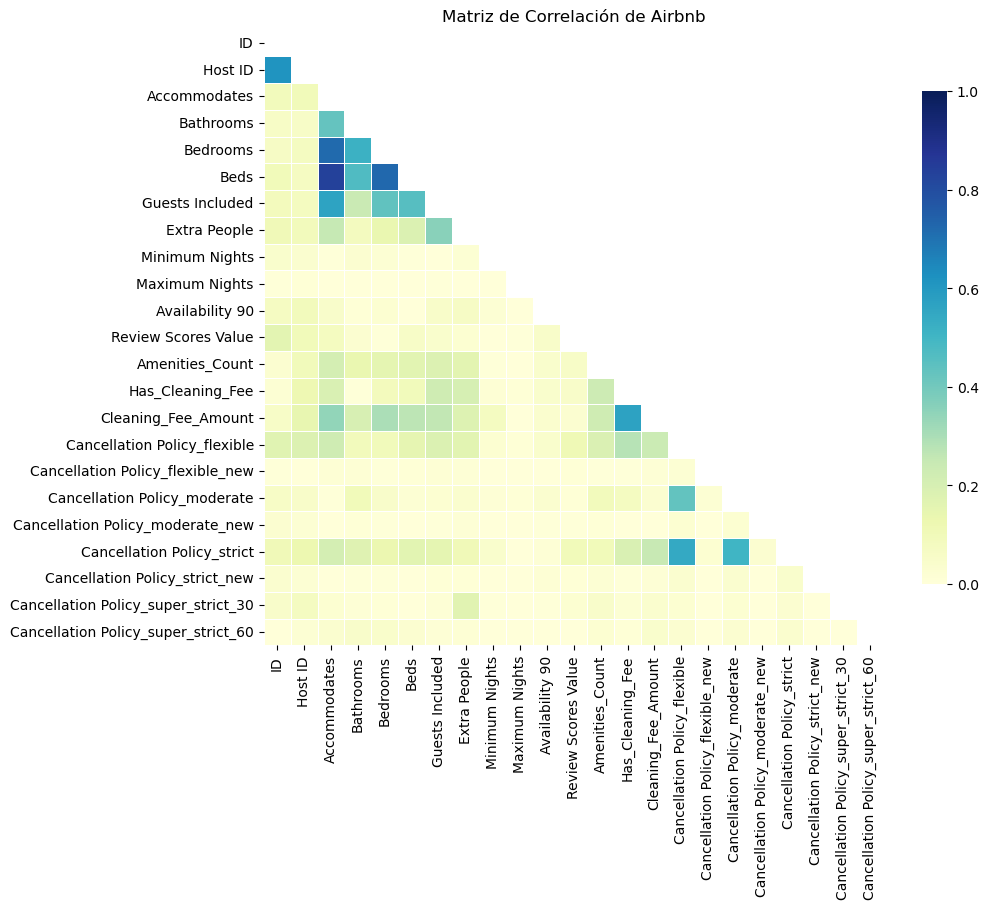

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

corr = np.abs(airbnb_data.drop(['Price'], axis=1).corr())

mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(10, 8))

sns.heatmap(corr, mask=mask, vmin=0.0, vmax=1.0, center=0.5,
            annot=False, linewidths=0.5, cmap="YlGnBu", cbar_kws={"shrink": .8})

plt.title("Matriz de Correlación de Airbnb")
plt.show()

Como complemento también  Vamos a pintar dos gráficas donde evaluamos  la importancia de las variables según su relevancia para predecir el **precio**  usando dos métodos: **F-test** (para relaciones lineales) y **Mutual Information** (para relaciones no lineales). 



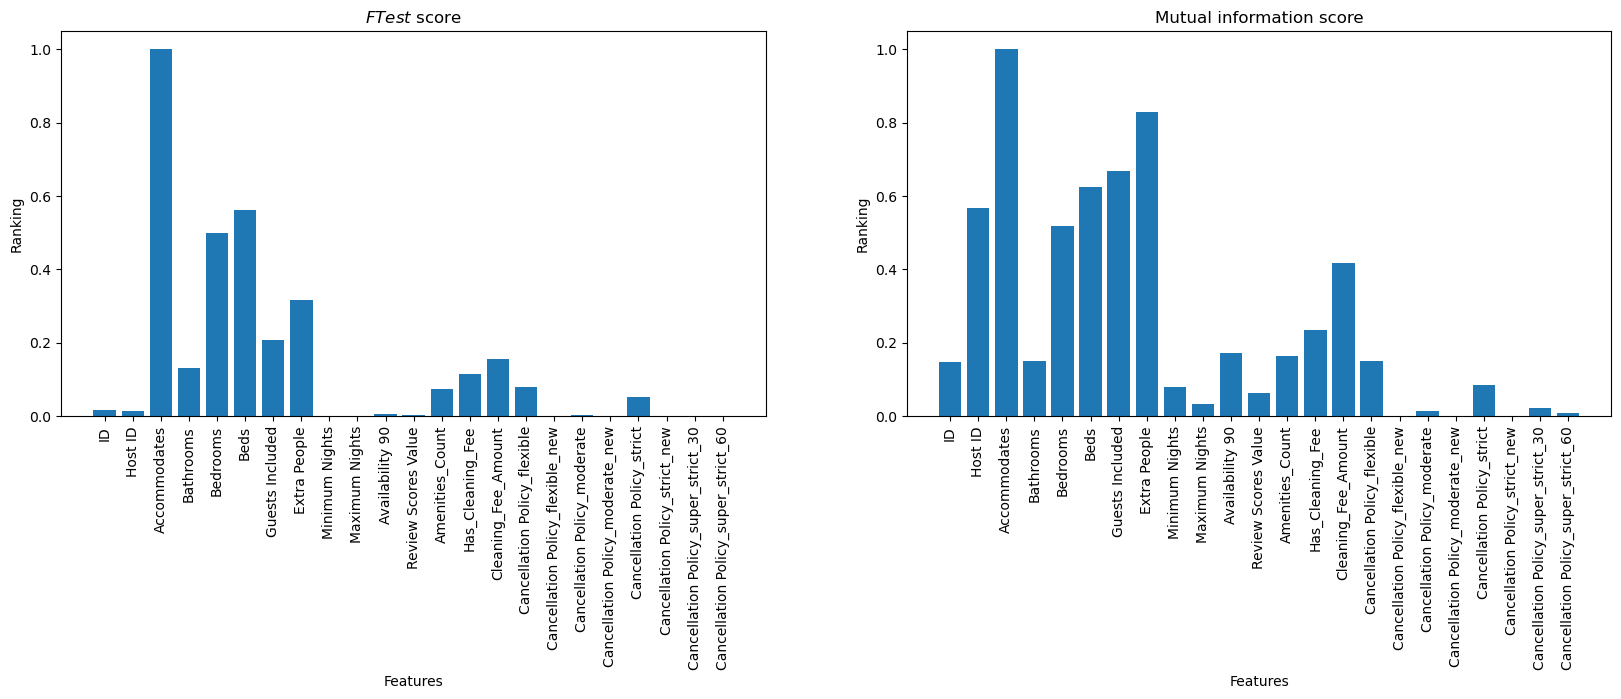

In [24]:
from sklearn.feature_selection import f_regression, mutual_info_regression
import numpy as np
import matplotlib.pyplot as plt

# Convertimos el DataFrame al formato necesario para scikit-learn
dataset = airbnb_data.values 

# Seleccionamos la columna de 'precio' (índice 7) como nuestra variable objetivo (y)
y = dataset[:, 7]  # columna de 'precio' (índice 7)

# Seleccionamos todas las columnas excepto la de 'precio' para X
X = np.delete(dataset, 7, axis=1)  # excluimos la columna en el índice 7 de las características

# Nombres de las características (sin la columna 'precio')
feature_names = airbnb_data.columns.drop('Price')  # Si el nombre de la columna es 'price'

# Estudiamos los dos métodos de filtrado
f_test, _ = f_regression(X, y)
f_test /= np.max(f_test)

mi = mutual_info_regression(X, y)
mi /= np.max(mi)

# Visualización
plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
plt.bar(range(X.shape[1]), f_test, align="center")
plt.xticks(range(X.shape[1]), feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Ranking')
plt.title('$F Test$ score')  # Relaciones LINEALES

plt.subplot(1, 2, 2)
plt.bar(range(X.shape[1]), mi, align="center")
plt.xticks(range(X.shape[1]), feature_names, rotation=90)
plt.xlabel('Features')
plt.ylabel('Ranking')
plt.title('Mutual information score')  # Relaciones NO LINEALES

plt.show()


Observamos que las variables Accommodates , Bathrooms, Bedrooms , Beds y Extra People , son algunas de las variables líneales más importantes para predecir el **Precio** y también que hay otras como Cancellation Policy  o Maximun Nights no nos interesan para la predicción.

Ahora vamos a generar varias gráficas donde se  muestran la distribución de las variables **'Bedrooms'**, **'Bathrooms'** y **'Accommodates'** . Esto nos ayuda a entender cómo se distribuyen estas características en las propiedades.


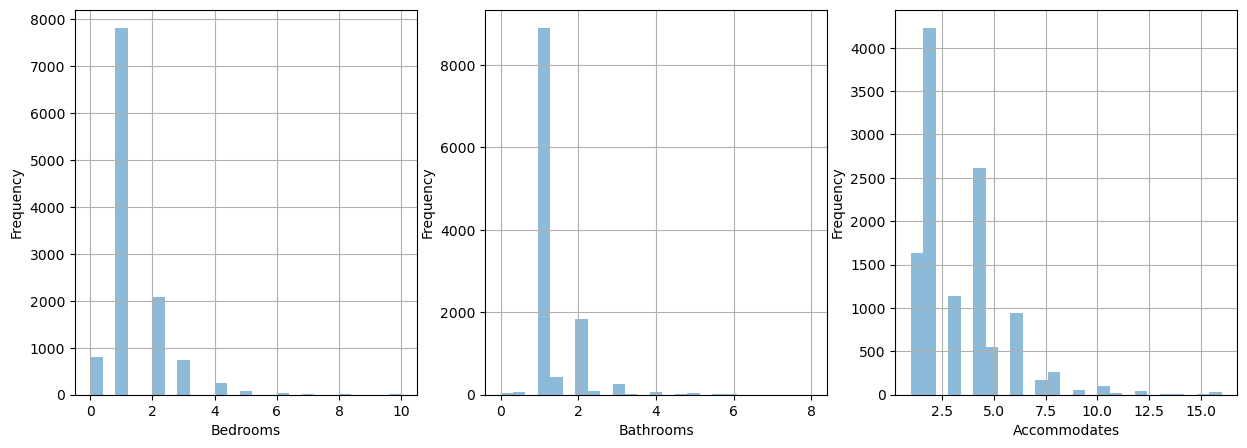

In [25]:
plt.figure(figsize=(15, 5))

plt.subplot(1,3,1)
airbnb_data['Bedrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
#plt.axis([0, 10, 0, 10000])
#plt.ylim(0, 15)
plt.xlabel('Bedrooms')

plt.subplot(1,3,2)
airbnb_data['Bathrooms'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Bathrooms')

plt.subplot(1,3,3)
airbnb_data['Accommodates'].plot.hist(alpha=0.5, bins=25, grid = True)
plt.xlabel('Accommodates')

plt.show()

 Procedemos a pintar el gráfico de dispersión entre **habitaciones** y **precio** , esto nos ayuda a visualizar la relación entre el número de habitaciones y el precio de las propiedades. Esta visualización me es útil para detectar tendencias y entender cómo varía el precio en función de las habitaciones.


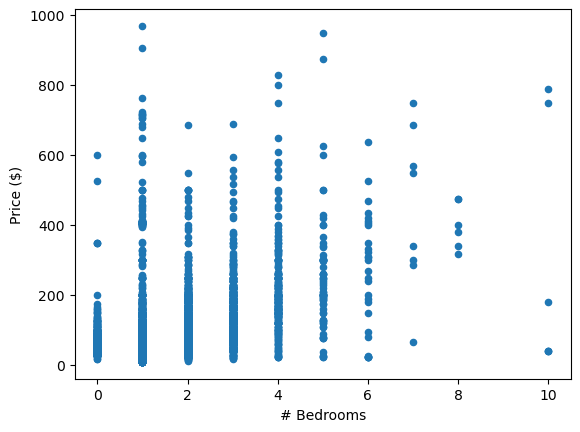

In [26]:

airbnb_data.plot(kind = 'scatter',x='Bedrooms',y = 'Price')
plt.xlabel('# Bedrooms')
plt.ylabel('Price ($)')
plt.show()

In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np


Ahora procedo a cargar los datos de Train una vez limpiados.

In [28]:

data_train = airbnb_data.values
y_train = data_train[:, 6]     # nos quedamos con la 7ª columna (índice 6), que es 'price'
X_train = np.delete(data_train, 6, axis=1)  # eliminamos la columna 'price' de X_train

## Resumen de limpieza de datos 
### (Limpieza de datos que hemos realizado anteriormente en el modelo **TRAIN**), comento el codigo puesto que ya realicé la limpieza anteriormente.

In [29]:
# Estas son todas las modificaciones (limpieza) que he realizado sobre el dataset de train

# airbnb_data = airbnb_data.drop([  # Eliminamos la columna "Square Feet".
#     "Square Feet"
# ], axis=1, errors='ignore')

# airbnb_data = airbnb_data.drop([  # Eliminamos múltiples columnas que no son necesarias para el análisis
#     "Features", "Listing Url", "Scrape ID", "Last Scraped", "Description", "Name", "Summary", "Space", 
#     "Neighborhood Overview", "Notes", "Transit", "Access", "Interaction", "House Rules", "Thumbnail Url", 
#     "Medium Url", "Picture Url", "XL Picture Url", "Host URL", "Host Name", "Host About", "Host Response Time", 
#     "Host Response Rate", "Host Acceptance Rate", "Host Thumbnail Url", "Host Picture Url", "Host Neighbourhood", 
#     "Host Verifications", "Street", "Neighbourhood", "Neighbourhood Cleansed", "Neighbourhood Group Cleansed", 
#     "Host Location", "Experiences Offered","City", "State", "Market", 
#     "Smart Location", "Country Code", "Country", "Property Type", "Room Type", "Bed Type", "Calendar Update", 
#     "Has Availability", "Calendar last Scraped", "First Review", "Last Review", "License", "Jurisdiction Names", 
#     "Host Since", "Zipcode", "Calendar Updated", "Latitude", "Longitude", "Geolocation", 
#     "Weekly Price", "Monthly Price", "Security Deposit","Review Scores Rating", "Review Scores Accuracy", "Review Scores Cleanliness", 
#     "Review Scores Checkin", "Review Scores Communication", "Review Scores Location", 
#     "Reviews per Month", "Number of Reviews","Availability 60", 
#     "Availability 365", "Availability 30", "Square Feet", "Host Listings Count", "Host Total Listings", "Calculated host listings count", "Host Total Listings Count"
# ], axis=1, errors="ignore")

# airbnb_data["Amenities_Count"] = airbnb_data['Amenities'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)  # Creamos la columna "Amenities_Count"

# airbnb_data = airbnb_data.drop(['Amenities'], axis=1, errors='ignore')  # Eliminamos la columna 'Amenities'

# columns_to_fill = ["Bathrooms", "Bedrooms", "Review Scores Value", "Beds"]  # Definimos las columnas que vamos a rellenar con el valor más frecuente (moda)

# for column in columns_to_fill:  # Rellenamos los valores faltantes con el valor más frecuente
#     mode_value = airbnb_data[column].mode()[0]
#     airbnb_data[column].fillna(mode_value, inplace=True)

# airbnb_data['Has_Cleaning_Fee'] = airbnb_data['Cleaning Fee'].apply(lambda x: 1 if pd.notna(x) and x > 0 else 0)  # Creamos la columna 'Has_Cleaning_Fee'

# airbnb_data['Cleaning_Fee_Amount'] = airbnb_data['Cleaning Fee'].apply(lambda x: x if pd.notna(x) and x > 0 else 0)  # Creamos la columna 'Cleaning_Fee_Amount'

# airbnb_data = airbnb_data.drop(['Cleaning Fee'], axis=1)  # Eliminamos la columna 'Cleaning Fee' 

# from sklearn.preprocessing import OneHotEncoder  # Importamos OneHotEncoder para la codificación

# encoder = OneHotEncoder(sparse=False)  # Creamos un objeto OneHotEncoder

# encoded_values = encoder.fit_transform(airbnb_data[['Cancellation Policy']])  # Ajustamos y transformamos la columna 'Cancellation Policy'

# encoded_df = pd.DataFrame(encoded_values, columns=encoder.get_feature_names_out(['Cancellation Policy']))  # Creamos un DataFrame con las columnas resultantes

# airbnb_data = pd.concat([airbnb_data, encoded_df], axis=1)  # Concatenamos las nuevas columnas codificadas

# airbnb_data = airbnb_data.drop(['Cancellation Policy'], axis=1)  # Eliminamos la columna original 'Cancellation Policy'

# airbnb_data = airbnb_data.dropna(subset=['Price'])  # Eliminamos las filas con valores nulos en la columna 'Price'


### Procedemos a realizar la misma limpieza de datos  que hemos realizado anteriormente en el conjunto **train**, al conjunto de **Test**.

In [30]:

airbnb_data_test = pd.read_csv('C:/Users/franc/machineLearning/Machine-Learning-101/Proyecto/airbnb-listings-extract_test.csv', decimal = ".", sep = ";")
# Elimino columnas innecesarias de test

airbnb_data_test = airbnb_data_test.drop([  
    "Features", "Listing Url", "Scrape ID", "Last Scraped", "Description", "Name", "Summary", "Space", 
    "Neighborhood Overview", "Notes", "Transit", "Access", "Interaction", "House Rules", "Thumbnail Url", 
    "Medium Url", "Picture Url", "XL Picture Url", "Host URL", "Host Name", "Host About", "Host Response Time", 
    "Host Response Rate", "Host Acceptance Rate", "Host Thumbnail Url", "Host Picture Url", "Host Neighbourhood", 
    "Host Verifications", "Street", "Neighbourhood", "Neighbourhood Cleansed", "Neighbourhood Group Cleansed", 
    "Host Location", "Experiences Offered", "City", "State", "Market", 
    "Smart Location", "Country Code", "Country", "Property Type", "Room Type", "Bed Type", "Calendar Update", 
    "Has Availability", "Calendar last Scraped", "First Review", "Last Review", "License", "Jurisdiction Names", 
    "Host Since", "Zipcode", "Calendar Updated", "Latitude", "Longitude", "Geolocation", 
    "Weekly Price", "Monthly Price", "Security Deposit","Review Scores Rating", "Review Scores Accuracy", 
    "Review Scores Cleanliness", "Review Scores Checkin", "Review Scores Communication", "Review Scores Location", 
    "Reviews per Month", "Number of Reviews","Availability 60", 
    "Availability 365", "Availability 30", "Square Feet", "Host Listings Count", "Host Total Listings", 
    "Calculated host listings count", "Host Total Listings Count"
], axis=1, errors="ignore")

# Luego realiza la limpieza de los datos: 
airbnb_data_test["Amenities_Count"] = airbnb_data_test['Amenities'].apply(lambda x: len(x.split(',')) if isinstance(x, str) else 0)
airbnb_data_test = airbnb_data_test.drop(['Amenities'], axis=1, errors='ignore')

columns_to_fill = ["Bathrooms", "Bedrooms", "Review Scores Value", "Beds"]
for column in columns_to_fill:
    mode_value = airbnb_data_test[column].mode()[0]
    airbnb_data_test[column].fillna(mode_value, inplace=True)

airbnb_data_test['Has_Cleaning_Fee'] = airbnb_data_test['Cleaning Fee'].apply(lambda x: 1 if pd.notna(x) and x > 0 else 0)
airbnb_data_test['Cleaning_Fee_Amount'] = airbnb_data_test['Cleaning Fee'].apply(lambda x: x if pd.notna(x) and x > 0 else 0)
airbnb_data_test = airbnb_data_test.drop(['Cleaning Fee'], axis=1)

from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(sparse=False)
encoded_values = encoder.fit_transform(airbnb_data_test[['Cancellation Policy']])
encoded_df = pd.DataFrame(encoded_values, columns=encoder.get_feature_names_out(['Cancellation Policy']))
airbnb_data_test = pd.concat([airbnb_data_test, encoded_df], axis=1)
airbnb_data_test = airbnb_data_test.drop(['Cancellation Policy'], axis=1)

airbnb_data_test = airbnb_data_test.dropna(subset=['Price'])

# Preparo los datos
data_test = airbnb_data_test.values
y_test = data_test[:, 6]      
X_test = np.delete(data_test, 6, axis=1)  

# Ahora continuo  con la normalización




### Importamos las líbrerias necesarias para elegir nuestro modelo 

In [31]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np

Ahora realizaremos **StandardScaler** para escalar los datos de entrenamiento y prueba. Primero, ajustamos el escalador a los datos de entrenamiento (**X_train**) y luego aplicamos la transformación tanto a los datos de entrenamiento como a los de prueba (**X_test**), asegurando que ambos conjuntos se normalicen con la misma escala para evitar sesgos en el modelo.


In [32]:
from sklearn import preprocessing

# Escalamos (con los datos de train)
scaler = preprocessing.StandardScaler().fit(X_train)
XtrainScaled = scaler.transform(X_train)

# Escalamos el conjunto de test utilizando el mismo scaler entrenado en train
XtestScaled = scaler.transform(X_test)


### Definición del modelo y Testeo del mejor modelo 

En este código estamos **evaluando varios modelos de predicción** para predecir el precio de los alojamientos en Airbnb. He elegido estos 4 modelos :

- **Lasso**
- **Random Forest**
- **Regresión Lineal**
- **Gradient Boosting**

Comparamos el desempeño de cada modelo utilizando dos métricas de error:
- **MSE** (Error Cuadrático Medio)
- **RMSE** (Raíz del Error Cuadrático Medio)

El modelo con el **menor RMSE** en el conjunto de prueba es seleccionado como el mejor, ya que predice con mayor precisión el precio de los alojamientos.

---


In [33]:
from sklearn.linear_model import Lasso, LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Defino los modelos a evaluar
models = {
    'Lasso': Lasso(alpha=1.0),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Regresión Lineal': LinearRegression(),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Creo un diccionario para almacenar los resultados de cada modelo
results = {}

# Función para entrenar y evaluar modelos
def evaluate_models(Xtrain, y_train, Xtest, y_test):
    for name, model in models.items():
        # Entrenar el modelo
        model.fit(Xtrain, y_train)
        
        # Hago predicciones en el conjunto de entrenamiento y prueba
        ytrain_pred = model.predict(Xtrain)
        ytest_pred = model.predict(Xtest)
        
        # Evaluo el modelo utilizando MSE y RMSE
        mse_train = mean_squared_error(y_train, ytrain_pred)
        mse_test = mean_squared_error(y_test, ytest_pred)
        
        rmse_train = np.sqrt(mse_train)
        rmse_test = np.sqrt(mse_test)
        
        # Almaceno los resultados
        results[name] = {
            'MSE Train': mse_train,
            'MSE Test': mse_test,
            'RMSE Train': rmse_train,
            'RMSE Test': rmse_test
        }
        
        # Imprimo los resultados del modelo
        print(f'{name} - MSE Train: {mse_train:.3g}, MSE Test: {mse_test:.3g}')
        print(f'{name} - RMSE Train: {rmse_train:.3g}, RMSE Test: {rmse_test:.3g}\n')
    
    return results

# Ejecuto la evaluación de los modelos
results = evaluate_models(XtrainScaled, y_train, XtestScaled, y_test)

# Selecciono el mejor modelo (el de menor RMSE en el conjunto de prueba)
best_model_name = min(results, key=lambda x: results[x]['RMSE Test'])
print(f"El mejor modelo es: {best_model_name}")


Lasso - MSE Train: 2.94e+03, MSE Test: 2.96e+03
Lasso - RMSE Train: 54.3, RMSE Test: 54.4

Random Forest - MSE Train: 248, MSE Test: 1.96e+03
Random Forest - RMSE Train: 15.7, RMSE Test: 44.3

Regresión Lineal - MSE Train: 2.91e+03, MSE Test: 2.96e+03
Regresión Lineal - RMSE Train: 54, RMSE Test: 54.4

Gradient Boosting - MSE Train: 1.5e+03, MSE Test: 1.92e+03
Gradient Boosting - RMSE Train: 38.7, RMSE Test: 43.9

El mejor modelo es: Gradient Boosting


### Resultados de la Evaluación de Modelos

Hemos evaluado los siguientes modelos para predecir el precio de los alojamientos en Airbnb:

- **Lasso**
- **Random Forest**
- **Regresión Lineal**
- **Gradient Boosting**

A continuación, se muestran los resultados obtenidos para cada modelo, utilizando las métricas **MSE** (Error Cuadrático Medio) y **RMSE** (Raíz del Error Cuadrático Medio), tanto para el conjunto de entrenamiento como para el conjunto de prueba:

| Modelo           | MSE Train | MSE Test | RMSE Train | RMSE Test |
|------------------|-----------|----------|------------|-----------|
| **Lasso**        | 2.94e+03  | 2.96e+03 | 54.3       | 54.4      |
| **Random Forest**| 248       | 1.96e+03 | 15.7       | 44.3      |
| **Regresión Lineal** | 2.91e+03  | 2.96e+03 | 54         | 54.4      |
| **Gradient Boosting** | 1.5e+03  | 1.92e+03 | 38.7       | 43.9      |

### Conclusión

El modelo con el **mejor rendimiento** en términos de **menor RMSE** en el conjunto de prueba es **Gradient Boosting**, por lo que se selecciona como el modelo final para hacer las predicciones.

---


In [34]:
# Entreno el modelo final con todos los datos de entrenamiento
final_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
final_model.fit(XtrainScaled, y_train)


GradientBoostingRegressor(random_state=42)

Ahora que tenemos el modelo final vamos a predecir sobre el conjunto de test 

In [35]:
y_test_pred = final_model.predict(XtestScaled)


Procedemos a evaluar el modelo final utilizando el **MSE** Y  **RMSE**

In [36]:
# Evaluar el modelo final utilizando MSE y RMSE
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print(f"Final Model - MSE Test: {mse_test:.3g}")
print(f"Final Model - RMSE Test: {rmse_test:.3g}")


Final Model - MSE Test: 1.92e+03
Final Model - RMSE Test: 43.9


Ahora procedemos a usar  **GridSearchCV** para optimizar los hiperparámetros del modelo  **GradientBoostingRegressor** mediante la búsqueda en una malla de posibles combinaciones. Usamos **validación cruzada (cv=3)** para evaluar el modelo en diferentes particiones del conjunto de entrenamiento, asegurando una mejor generalización y evitando sobreajuste. Finalmente, imprimo los mejores parámetros encontrados.

In [37]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7]
}

grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=3)
grid_search.fit(XtrainScaled, y_train)
print("Mejores parámetros encontrados: ", grid_search.best_params_)


Mejores parámetros encontrados:  {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200}


### Ahora que sabemos cuáles son los mejores hiperparámetros, vamos a  entrenar el modelo con ellos y a evaluarlo para ver cómo mejora el rendimiento en términos de **MSE** y **RMSE**.

In [38]:
# Entreno el modelo con los mejores parámetros
best_model = grid_search.best_estimator_

# Realizo las predicciones en el conjunto de test
ytest_pred = best_model.predict(XtestScaled)

# Evaluo el rendimiento del modelo con el conjunto de test
mse_test = mean_squared_error(y_test, ytest_pred)
rmse_test = np.sqrt(mse_test)

print(f"Optimized Model - MSE Test: {mse_test:.3g}")
print(f"Optimized Model - RMSE Test: {rmse_test:.3g}")

# Entreno el modelo con los mejores parámetros
best_model = grid_search.best_estimator_

# Realizo las predicciones en el conjunto de test
ytest_pred = best_model.predict(XtestScaled)

# Evaluo el rendimiento del modelo con el conjunto de test
mse_test = mean_squared_error(y_test, ytest_pred)
rmse_test = np.sqrt(mse_test)

print(f"Optimized Model - MSE Test: {mse_test:.3g}")
print(f"Optimized Model - RMSE Test: {rmse_test:.3g}")


Optimized Model - MSE Test: 1.82e+03
Optimized Model - RMSE Test: 42.6
Optimized Model - MSE Test: 1.82e+03
Optimized Model - RMSE Test: 42.6


### Procedemos a ver que con el modelo optimizado hemos conseguido una mejora significativa en el MSE y El RMSE 

Y a continuación realizaremos una gráfica comparativa frente a los valores reales para obtener una mejor idea de como esta funcioando el modelo 

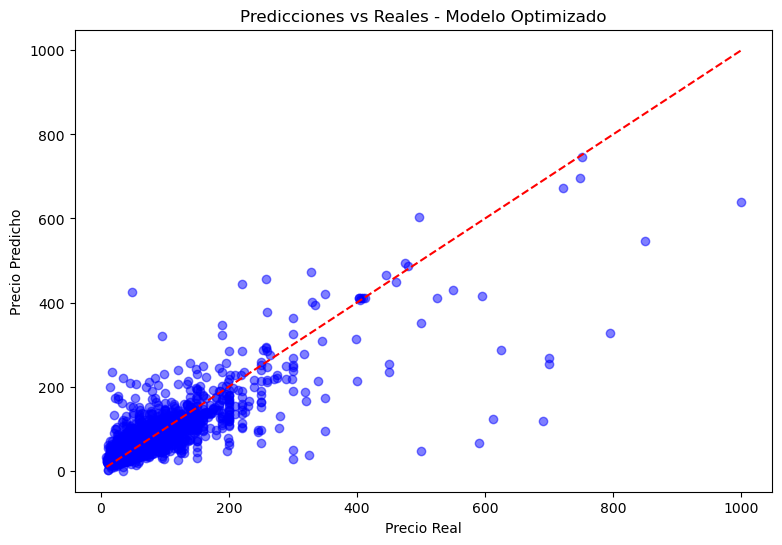

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 6))
plt.scatter(y_test, ytest_pred, c='blue', alpha=0.5) 
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Predicciones vs Reales - Modelo Optimizado")

plt.show()


### Conclusión sobre las Predicciones vs Valores Reales

La gráfica muestra la relación entre los **precios reales** (`Precio Real`) y los **precios predichos** (`Precio Predicho`) por el modelo optimizado de **Gradient Boosting**. Los puntos representan las predicciones para cada observación en el conjunto de test, mientras que la **línea discontinua roja** indica la referencia ideal donde los precios predichos coinciden exactamente con los reales.

Al observar la dispersión de los puntos en relación con esta línea de referencia, podemos evaluar el desempeño del modelo. Si los puntos se alinearan perfectamente con la línea, significaría que el modelo está haciendo predicciones exactas, lo que daría lugar a un *Overfitting*.

Observamos que los puntos donde el **precio** es mayor estan más alejados de la línea y donde los precios son mas pequeños tenemos la mayor cantidad de datos y se ajustan mucho mejor a la línea , lo que me lleva a pensar que eso ocurre debido a que tenemos poca cantidad de pisos con tan alto precio , lo que complica predecir con mayor exactitud el valor de los pisos con **precio** alto. 

En general, una menor dispersión alrededor de la línea discontinua indica una **mejor precisión** en las predicciones. Además, el valor obtenido de **RMSE (Root Mean Squared Error)** en el conjunto de prueba (**42.6**) también refleja el nivel de error promedio de las predicciones en relación con los valores reales. Esto nos permite evaluar y ajustar el modelo para obtener resultados más precisos.
